Lorenz方程是一组常微分方程，由美国气象学家爱德华·洛伦兹（Edward Lorenz）在1963年提出。这组方程描述了一个三维动力系统，通常用于模拟大气对流现象。Lorenz方程因其非线性特性而著名，并且是混沌理论中的一个经典例子。

Lorenz方程的形式如下：

\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}


其中，$x, y, z$是系统的状态变量，$t$是时间，$\sigma、 \rho、 \beta$是系统参数。常见的参数值为$sigma = 10、rho = 28、beta = \frac{8}{3}$。

In [1]:
using PyCall, BenchmarkTools, DifferentialEquations
@pyimport matplotlib.pyplot as plt
mpl_toolkits = pyimport("mpl_toolkits.mplot3d")

PyObject <module 'mpl_toolkits.mplot3d' from '/home/vtchen/miniconda3/envs/mojo/lib/python3.11/site-packages/mpl_toolkits/mplot3d/__init__.py'>

In [5]:
x = (1, 2 ,3)
u = (x, y, z)
u[1]

3

In [9]:
function lorenz!(du,u,p,t)
    du[1] = 10.0(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob, Tsit5(), saveat=0.1)


retcode: Success
Interpolation: 1st order linear
t: 1001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   ⋮
  99.2
  99.3
  99.4
  99.5
  99.6
  99.7
  99.8
  99.9
 100.0
u: 1001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [1.2714553023067015, 2.5502478518950933, 0.11413844664919727]
 [3.913144760800032, 8.433083436607756, 1.2683805368437746]
 [11.696231290988905, 22.993582140092236, 11.769786852990132]
 [19.698657992628068, 16.751621444331175, 45.825882196685754]
 [6.503654868223295, -8.508354686562312, 38.09199724477568]
 [-3.33207695674137, -8.69883872533622, 28.734916714091494]
 [-6.535890895884056, -8.425700757022684, 25.905899131722673]
 [-8.038346410584237, -9.328951817674264, 25.57928472898344]
 [-9.127843846506625, -9.915193241257919, 26.98022668761901]
 ⋮
 [2.366072300859788, 0.9388795617534593, 22.910490696134246]
 [1.9412814885061938, 2.319336320080047, 17.82603208972583]
 [3.0118907446786904, 4.845879884304901, 14.401

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(sol[1, :], sol[2, :], sol[3, :], lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

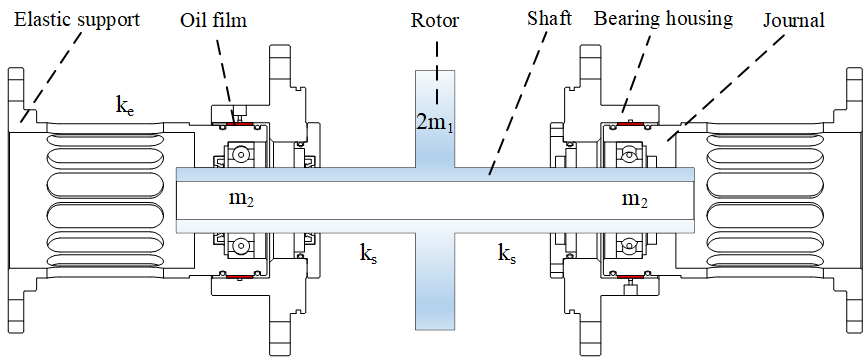

$$
\begin{align}
  & {{m}_{1}}{{{{x}''}}_{1}}=-{{c}_{r}}{{{{x}'}}_{1}}-{{k}_{s}}\left( {{x}_{1}}-{{x}_{2}} \right)+{{m}_{1}}u{{\omega }^{2}}\cos \left( \omega t \right) \\ 
 & {{m}_{1}}{{{{y}''}}_{1}}=-{{c}_{r}}{{{{y}'}}_{1}}-{{k}_{s}}\left( {{y}_{1}}-{{y}_{2}} \right)-{{m}_{1}}g+{{m}_{1}}u{{\omega }^{2}}\sin \left( \omega t \right) \\ 
 & {{m}_{2}}{{{{x}''}}_{2}}={{F}_{x}}+{{k}_{s}}\left( {{x}_{1}}-{{x}_{2}} \right)-{{k}_{e}}x \\ 
 & {{m}_{2}}{{{{y}''}}_{2}}={{F}_{y}}+{{k}_{s}}\left( {{y}_{1}}-{{y}_{2}} \right)-{{k}_{e}}{{y}_{2}}-{{m}_{2}}g \\ 
\end{align}
$$

Let
$
{{X}_{1}}={{{x}_{1}}}/{c}\;,{{Y}_{1}}={{{y}_{1}}}/{c}\;,{{X}_{2}}={{{x}_{2}}}/{c}\;,{{Y}_{2}}={{{y}_{2}}}/{c}\;,U={u}/{c}\;,\omega _{n}^{2}={{{k}_{s}}}/{{{m}_{1}}}\;,\tau ={{\omega }_{n}}t, 
\Omega ={\omega }/{{{\omega }_{n}}}
$

$$
\begin{align}
  & {{X}_{1}}^{\prime \prime }=-2\zeta {{{{X}'}}_{1}}-\left( {{X}_{1}}-{{X}_{2}} \right)+U{{\Omega }^{2}}\cos \Omega \tau  \\ 
 & {{{{Y}''}}_{1}}=-2\zeta {{{{Y}'}}_{1}}-\left( {{Y}_{1}}-{{Y}_{2}} \right)-W+U{{\Omega }^{2}}\sin \Omega \tau  \\ 
 & {{{{X}''}}_{2}}=\frac{{{F}_{x}}}{{{m}_{2}}c\omega _{n}^{2}}-{{\kappa }_{1}}\left( {{X}_{1}}-{{X}_{2}} \right)-{{\kappa }_{2}}{{X}_{2}} \\ 
 & {{{{Y}''}}_{2}}=\frac{{{F}_{y}}}{{{m}_{2}}c\omega _{n}^{2}}-{{\kappa }_{1}}\left( {{Y}_{1}}-{{Y}_{2}} \right)-{{\kappa }_{2}}{{Y}_{2}}-\frac{g}{c\omega _{n}^{2}} \\ 
\end{align}

$$

where $\zeta ={{{c}_{r}}}/{\left( 2{{m}_{1}}{{\omega }_{n}} \right)}\;,{{\kappa }_{1}}={{{k}_{s}}}/{\left( {{m}_{2}}\omega _{n}^{2} \right)}\;,{{\kappa }_{2}}={{{k}_{e}}}/{\left( {{m}_{2}}\omega _{n}^{2} \right)}$

In [ ]:
function odesfd_rotor!(du,u,p,t)
    C, U, ζ, Κ, W, α, M₂, Ω, ωₙ, R₁, L, μ = p
    para = R₁, C, L, μ
    Fx, Fy = film_force_md1(C*u[5], C*u[7], C*ωₙ*u[6], C*ωₙ*u[8], para)

    du[1]  = u[2]
    du[2]  = -2ζ*u[2] - (u[1] - u[5]) + U*Ω^2*cos(Ω*t)
    du[3]  = u[4]
    du[4]  = -2ζ*u[4] - (u[3] - u[7]) + U*Ω^2*sin(Ω*t) - W
    du[5]  = u[6]
    du[6]  = Fx/(M₂*C*ωₙ^2) - (u[5] - u[1])/α - Κ/α*u[5]
    du[7]  = u[8]
    du[8]  = Fy/(M₂*C*ωₙ^2) - (u[7] - u[3])/α - Κ/α*u[7] - W
end